In [2]:
import numpy as np 
import cvxpy as cp
import pandas as pd 
import random
from sklearn.datasets import load_iris

# Q1

In [31]:
iris = load_iris()
iris = pd.DataFrame(data = np.c_[iris['data'][:,[0,3]],iris['target']],columns = ['sepal_length','petal_width']+['target'])

In [32]:
features = iris.loc[:,['sepal_length','petal_width']]
target = iris.loc[:,['target']]

In [33]:
X = features.values
Y = target.values.tolist()

for i in range(0,len(Y)):
    if (int(Y[i][0])!=0):
        Y[i][0] = -1
        
    elif (int(Y[i][0])==0):
        Y[i][0] = 1

Y = np.array(Y).reshape(150,)

In [34]:
from sklearn.utils import shuffle 
X,Y = shuffle(X,Y)

def minimizing_func(w1,w2):
    return 0.5*(w1**2 + w2**2)

w1 = cp.Variable()
w2 = cp.Variable()
b = cp.Variable()
crt = []
for i in range (0,len(Y)):
    crt.append(Y[i]*(w1*X[i][0]+w2*X[i][1]+b)-1 >= 0)

In [35]:
problem = cp.Problem(cp.Minimize(minimizing_func(w1,w2)), crt)

In [36]:
problem.solve()

12.499999999999988

In [37]:
for j in crt:
    print(j.dual_value, end = " ,")

0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.8636384679166353 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,3.6470793393927146 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,12.499999999999991 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,4.3392015390685845 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.003001314212201234 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,3.6470793394098555 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,

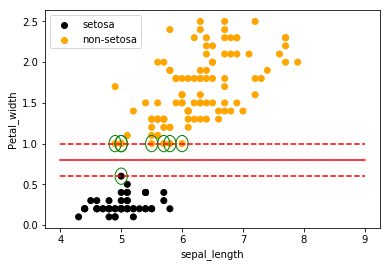

In [38]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sv_X = []
sv_Y = []
for i in range(0,len(X)):
    p = X[i][0]
    q = X[i][1]
    t1 = (1 - b.value - w1.value*p)/w2.value
    t2 = (-1 - b.value - w1.value*p)/w2.value
    if( round(t1,1) == q or round(t2,1) == q):
        sv_X.append(X[i])
        sv_Y.append(Y[i])
        
x = np.linspace(4,9,2)
y1 = (-1*b.value - 1*w1.value*x)/w2.value
y2 = (1 -1*b.value - 1*w1.value*x)/w2.value
y3 = (-1 -1*b.value - 1*w1.value*x)/w2.value
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in sv_X:
    circle = plt.Circle((i[0],i[1]), radius = 0.1,color = "green",fill = False)
    ax.add_patch(circle)
scatter = plt.scatter(X[:,0],X[:,1],c = Y,cmap = ListedColormap(['orange','black']))
plt.plot(x,y1,c = "red")
plt.plot(x,y2,'--',c = "red")
plt.plot(x,y3,'--',c = "red")
plt.xlabel("sepal_length")
plt.ylabel("Petal_width")
plt.legend((scatter, scatter), ['setosa', 'non-setosa'], loc="best")
ax = plt.gca()
legend = ax.get_legend()
legend.legendHandles[1].set_color('orange')
legend.legendHandles[0].set_color('black')
plt.show()

# using scikitlearn

In [12]:
from sklearn.svm import SVC

classifier= SVC(kernel="linear")
classifier.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

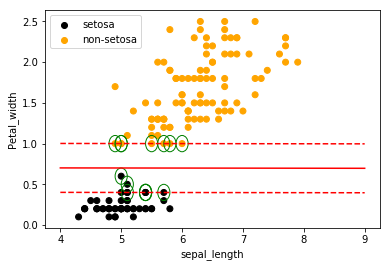

In [13]:
x = np.linspace(4,9,2)
w1 = classifier.coef_[0][0]
w2 = classifier.coef_[0][1]
b = classifier.intercept_[0]
sv = classifier.support_vectors_

y1 = (-1*b - 1*w1*x)/w2
y2 = (1 -1*b - 1*w1*x)/w2
y3 = (-1 -1*b - 1*w1*x)/w2
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in sv:
    circle = plt.Circle((i[0],i[1]), radius = 0.1,color = "green",fill = False)
    ax.add_patch(circle)
scatter = plt.scatter(X[:,0],X[:,1],c = Y,cmap = ListedColormap(['orange','black']))
plt.plot(x,y1,c = "red")
plt.plot(x,y2,'--',c = "red")
plt.plot(x,y3,'--',c = "red")
plt.xlabel("sepal_length")
plt.ylabel("Petal_width")
plt.legend((scatter, scatter), ['setosa', 'non-setosa'], loc="best")
ax = plt.gca()
legend = ax.get_legend()
legend.legendHandles[1].set_color('orange')
legend.legendHandles[0].set_color('black')
plt.show()

# using only support vectors for training

In [14]:
w1 = cp.Variable()
w2 = cp.Variable()
b = cp.Variable()
crt = []
for i in range (0,len(sv_Y)):
    crt.append(sv_Y[i]*(w1*sv_X[i][0]+w2*sv_X[i][1]+b)-1 >= 0)

In [15]:
problem = cp.Problem(cp.Minimize(minimizing_func(w1,w2)), crt)
problem.solve()

12.500000241640027

In [16]:
sv_X_sv = []
sv_Y_sv = []
for i in range(0,len(sv_X)):
    x = sv_X[i][0]
    y = sv_X[i][1]
    t1 = (1 - b.value - w1.value*x)/w2.value
    t2 = (-1 - b.value - w1.value*x)/w2.value
    if( round(t1,1) == y or round(t2,1) == y):
        sv_X_sv.append(sv_X[i])
        sv_Y_sv.append(sv_Y[i])
sv_X = np.array(sv_X)

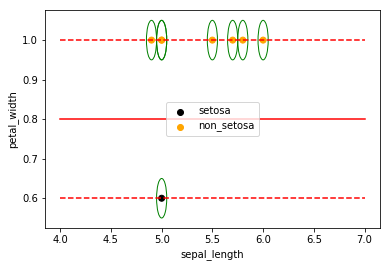

In [17]:
x = np.linspace(4,7,2)
y1 = (-1*b.value - 1*w1.value*x)/w2.value
y2 = (1 -1*b.value - 1*w1.value*x)/w2.value
y3 = (-1 -1*b.value - 1*w1.value*x)/w2.value
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
for i in sv_X_sv:
    circle = plt.Circle((i[0],i[1]), radius = 0.05,color = "green",fill = False)
    ax.add_patch(circle)
scatter = plt.scatter(sv_X[:,0],sv_X[:,1],c = sv_Y,cmap = ListedColormap(['orange','black']))
plt.plot(x,y1,c = "red")
plt.plot(x,y2,'--',c = "red")
plt.plot(x,y3,'--',c = "red")
plt.xlabel("sepal_length")
plt.ylabel("petal_width")
plt.legend((scatter, scatter), ['setosa', 'non_setosa'], loc="best")
ax = plt.gca()
legend = ax.get_legend()
legend.legendHandles[1].set_color('orange')
legend.legendHandles[0].set_color('black')
plt.show()

yes the decision boundary will remain the same since these are the only points which control the maximum margin 

# Q2

In [18]:
iris= load_iris()
iris = pd.DataFrame(data = np.c_[iris['data'][:,[0,1]],iris['target']],columns = ['sepal_length','sepal_width']+['target'])
features = iris.loc[:,['sepal_length','sepal_width']]
target = iris.loc[:,['target']]
X = features.values
Y = target.values.tolist()
X,Y = shuffle(X,Y)
for i in range(len(Y)):
    if(int(Y[i][0]) != 2):
        Y[i][0] = -1
    elif(int(Y[i][0]) == 2):
        Y[i][0] = 1
Y = np.array(Y).reshape(150,)

def obj_func(X, Y, w1, w2, b, k):
    hloss = 0
    for i in range(len(Y)):
        hloss = hloss + cp.maximum(0, 1-Y[i]*(w1*X[i][0]+w2*X[i][1]+b))
    penalty = (0.5/k)*(w1**2+w2**2)
    return hloss + penalty

# auto-grad

In [19]:
def ag_optimization(wb , X ,Y,k):
    w1 = wb[0]
    w2 = wb[1]
    b = wb[2]
    hloss = 0
    for i in range(len(Y)):
        hloss = hloss + max(0, 1-Y[i]*(w1*X[i][0]+w2*X[i][1]+b))
    penalty = (0.5/k)*(w1**2+w2**2)
    return hloss + penalty

In [20]:
from autograd import grad
def AgSVC(X,Y,k,iterations =10, alpha = 0.01):
    w1 = random.random()
    w2 = random.random()
    b = random.random()
    gradients = grad(ag_optimization)
    for i in range(iterations):
        wb = [w1,w2,b]
        w1_t,w2_t,b_t = gradients(wb, X,Y,k)
        w1 = w1 - alpha*w1_t
        w2 = w2 - alpha*w2_t
        b  = b - alpha*b_t
    return w1,w2,b

In [21]:
AgSVC(X,Y,10)

(-4.369076791947085, -4.6255929880169075, -1.0093520123146544)

In [22]:
w1 = cp.Variable()
w2 = cp.Variable()
b = cp.Variable()
k = 20
problem = cp.Problem(cp.Minimize(obj_func(X, Y, w1, w2, b, k)))
problem.solve()

65.50019767028488

In [23]:
print(w1.value,w2.value,b.value)

2.000024801246315 -0.00016155595579580334 -12.399563014636893


In [24]:
sv = []
for i in range(len(Y)):
    e = max(0, 1-Y[i]*(w1.value*X[i][0]+w2.value*X[i][1]+b.value))
    t = Y[i]*(w1.value*X[i][0]+w2.value*X[i][1]+b.value)
    if((round(t) == 1) or (0<e<1) or (e > 1)):
        sv.append(X[i])

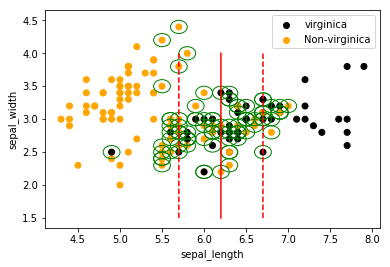

In [25]:
y = np.linspace(1.5,4,2)
x1 = (-1*b.value - 1*w2.value*y)/w1.value
x2 = (1 -1*b.value - 1*w2.value*y)/w1.value
x3 = (-1 -1*b.value - 1*w2.value*y)/w1.value
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in sv:
    circle = plt.Circle((i[0],i[1]), radius = 0.1,color = "green",fill = False)
    ax.add_patch(circle)
scatter = plt.scatter(X[:,0],X[:,1],c = Y, cmap = ListedColormap(['orange','black']))
plt.plot(x1,y,c = "red")
plt.plot(x2,y,'--',c = "red")
plt.plot(x3,y,'--',c = "red")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend((scatter, scatter), ['virginica', 'Non-virginica'], loc="best")
ax = plt.gca()
legend = ax.get_legend()
legend.legendHandles[1].set_color('orange')
legend.legendHandles[0].set_color('black')
plt.show()

# using scikitlearn

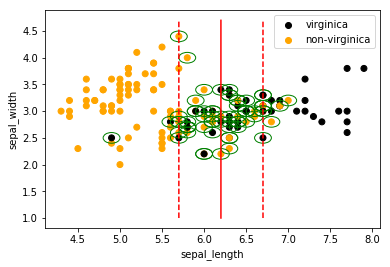

In [26]:
model = SVC(kernel="linear",C =10)
model.fit(X,Y)
sv_s = model.support_vectors_
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
b = model.intercept_[0]
y = np.linspace(1,4.7,2)
x1 = (-1*b - 1*w2*y)/w1
x2 = (1 -1*b - 1*w2*y)/w1
x3 = (-1 -1*b - 1*w2*y)/w1
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in sv_s:
    circle = plt.Circle((i[0],i[1]), radius = 0.1,color = "green",fill = False)
    ax.add_patch(circle)
scatter = plt.scatter(X[:,0],X[:,1],c = Y,cmap = ListedColormap(['orange','black']))
plt.plot(x1,y,c = "red")
plt.plot(x2,y,'--',c = "red")
plt.plot(x3,y,'--',c = "red")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend((scatter, scatter), ['virginica', 'non-virginica'], loc="best")
ax = plt.gca()
legend = ax.get_legend()
legend.legendHandles[1].set_color('orange')
legend.legendHandles[0].set_color('black')
plt.show()

yes we get the same answer as the previous one

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


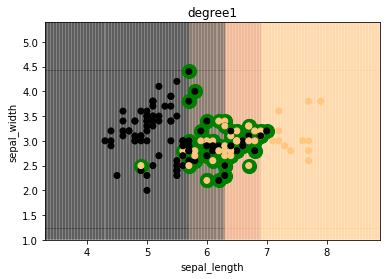

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


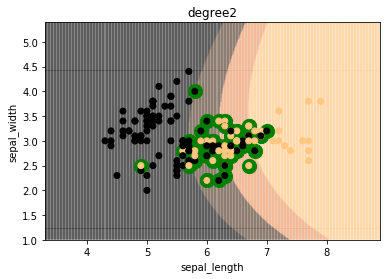

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


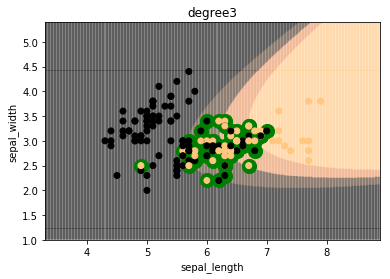

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


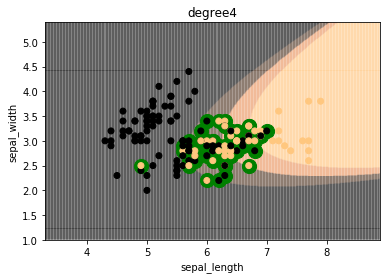

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


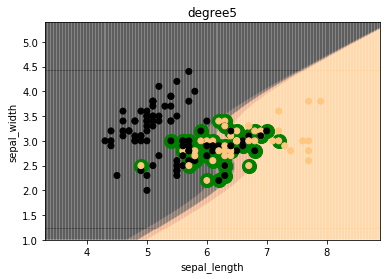

In [27]:
for degree in range(1,6):
    classifier = SVC(kernel='poly',degree = degree)
    classifier.fit(X,Y)
    sv_deg = classifier.support_vectors_
    x1, x2 = np.meshgrid(np.arange(X.T[0].min() - 1, X.T[0].max() + 1, 0.01), np.arange(X.T[1].min() - 1, X.T[1].max() + 1, 0.01))
    meshgrid = np.c_[x1.ravel(), x2.ravel()]
    classifier_predictions = classifier.decision_function(meshgrid)
    for i in range(len(classifier_predictions)):
        if(classifier_predictions[i] < -1):
            classifier_predictions[i] = -1
        elif(classifier_predictions[i] > 1):
            classifier_predictions[i] = 1
        elif(classifier_predictions[i] > 0):
            classifier_predictions[i] = 0.5
        else:
            classifier_predictions[i] = -0.5
    classifier_p = np.array(classifier_predictions).reshape(x1.shape)
    plt.pcolormesh(x1,x2,classifier_p, cmap='copper',alpha = 0.1)
    plt.scatter(sv_deg.T[0], sv_deg.T[1],c='green',s=200)
    plt.scatter(X.T[0], X.T[1], c= Y, cmap='copper')
    plt.xlabel("sepal_length")
    plt.ylabel("sepal_width")
    plt.title("degree" + str(degree))
    file_name = str(format(degree , '04d')) + '.jpg'
    plt.savefig(file_name,dpi=96)
    plt.show()

In [28]:
!convert -delay 20 -loop 0 *.jpg degree.gif
from IPython.display import Image
Image(url = 'degree.gif')

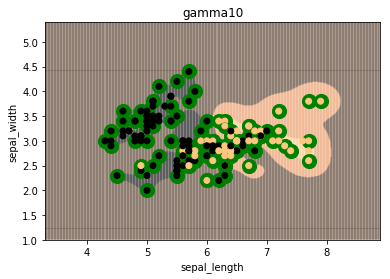

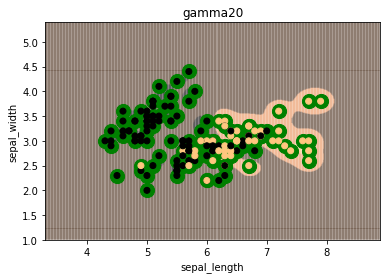

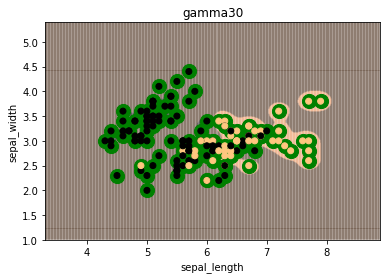

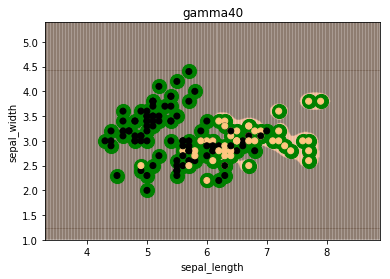

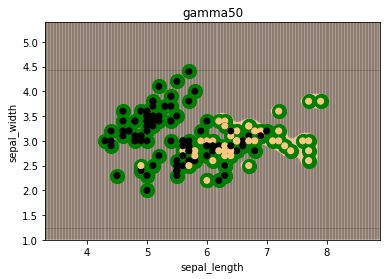

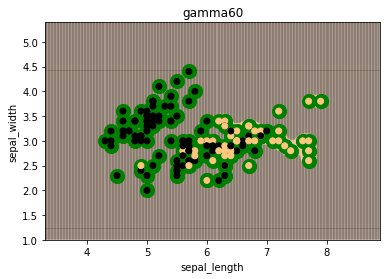

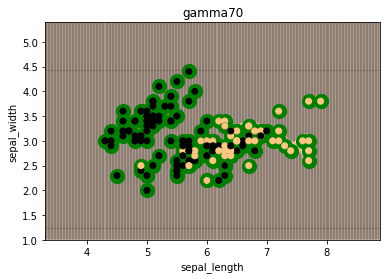

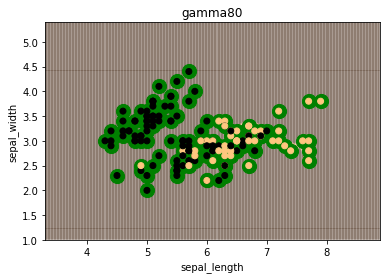

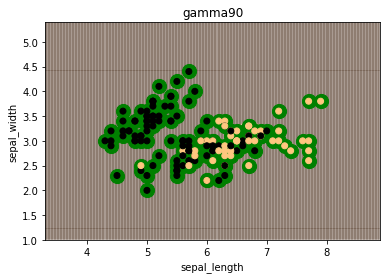

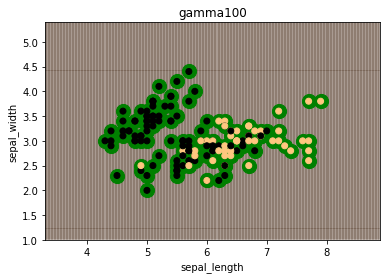

In [29]:
for g in [10,20,30,40,50,60,70,80,90,100]:
    classifier = SVC(kernel='rbf',gamma = g)
    classifier.fit(X,Y)
    sv_g = classifier.support_vectors_
    x1, x2 = np.meshgrid(np.arange(X.T[0].min() - 1, X.T[0].max() + 1, 0.01), np.arange(X.T[1].min() - 1, X.T[1].max() + 1, 0.01))
    meshgrid = np.c_[x1.ravel(), x2.ravel()]
    classifier_predictions = classifier.decision_function(meshgrid)
    for i in range(len(classifier_predictions)):
        if(classifier_predictions[i] < -1):
            classifier_predictions[i] = -1
        elif(classifier_predictions[i] > 1):
            classifier_predictions[i] = 1
        elif(classifier_predictions[i] > 0):
            classifier_predictions[i] = 0.5
        else:
            classifier_predictions[i] = -0.5
    classifier_p = np.array(classifier_predictions).reshape(x1.shape)
    plt.pcolormesh(x1,x2,classifier_p, cmap='copper',alpha = 0.1)
    plt.scatter(sv_g.T[0], sv_g.T[1],c='green',s=200)
    plt.scatter(X.T[0], X.T[1], c= Y, cmap='copper')
    plt.xlabel("sepal_length")
    plt.ylabel("sepal_width")
    plt.title("gamma" + str(g))
    file_name = str(format(g, '04d')) + '.png'
    plt.savefig(file_name,dpi=96)
    plt.show()

In [30]:
!convert -delay 50 -loop 0 *.png gamma.gif
from IPython.display import Image
Image(url = 'gamma.gif')

As gamma increases the model overfits.. whereas when degree increases smoothness with the plane increases and can fit complex data

reference: https://www.cvxpy.org/examples/machine_learning/ridge_regression.html
https://scientific-python-101.readthedocs.io/matplotlib/pcolormesh_plots.html
